In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('PDIR_200003_202204   nizampatnam m.csv')

In [3]:
df.head()

,time,Rain
0,2000-03-01,5
1,2000-04-01,8
2,2000-05-01,38
3,2000-06-01,233
4,2000-07-01,406


In [4]:
df.tail()

,time,Rain
261,2021-12-01,1
262,2022-01-01,1
263,2022-02-01,0
264,2022-03-01,1
265,2022-04-01,4


In [5]:
df.columns=["time","Rain"]
df.head()

,time,Rain
0,2000-03-01,5
1,2000-04-01,8
2,2000-05-01,38
3,2000-06-01,233
4,2000-07-01,406


In [6]:
df['time']=pd.to_datetime(df['time'])

In [7]:
df.head()

,time,Rain
0,2000-03-01,5
1,2000-04-01,8
2,2000-05-01,38
3,2000-06-01,233
4,2000-07-01,406


In [8]:
df.set_index('time',inplace=True)

In [9]:
df.head()

,Rain
time,
2000-03-01,5
2000-04-01,8
2000-05-01,38
2000-06-01,233
2000-07-01,406


In [10]:
df.describe()

,Rain
count,266.000000
mean,119.729323
std,156.008545
min,0.000000
25%,7.250000
50%,51.000000
75%,190.500000
max,1124.000000


In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
test_result=adfuller(df['Rain'])

In [13]:
def adfuller_test(Rain):
    result=adfuller(Rain)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [14]:
adfuller_test(df['Rain'])

ADF Test Statistic : -5.107345044427589
p-value : 1.354999472656234e-05
#Lags Used : 16
Number of Observations Used : 249
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='time'>

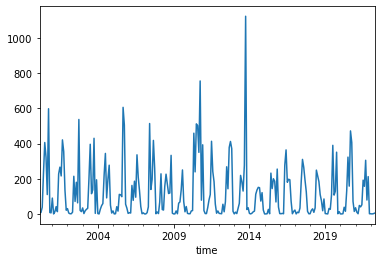

In [15]:
df['Rain'].plot()

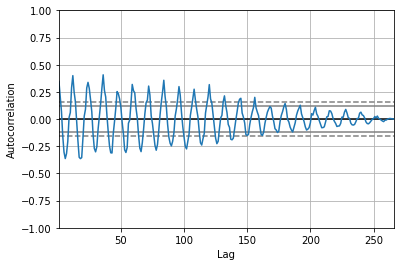

In [16]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Rain'])
plt.show()

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

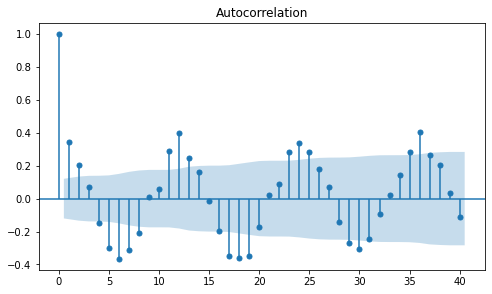

In [18]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Rain'].iloc[1:],lags=40,ax=ax1)

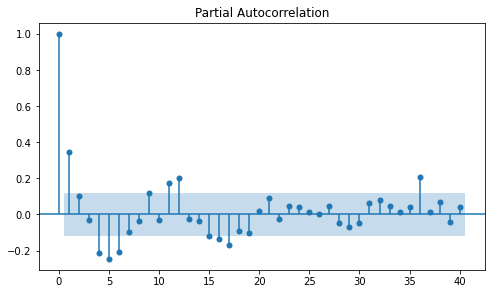

In [19]:
fig = plt.figure(figsize=(8,10))
ax2 = fig.add_subplot(211)
fig = plot_pacf(df['Rain'].iloc[1:],lags=40,ax=ax2)

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [21]:
model=ARIMA(df['Rain'],order=(1,0,1))
model_fit=model.fit()

C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Rain   No. Observations:                  266
Model:                     ARMA(1, 1)   Log Likelihood               -1702.435
Method:                       css-mle   S.D. of innovations            145.611
Date:                Wed, 18 May 2022   AIC                           3412.871
Time:                        14:36:06   BIC                           3427.205
Sample:                    03-01-2000   HQIC                          3418.629
                         - 04-01-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.0521     14.748      8.072      0.000      90.147     147.958
ar.L1.Rain     0.5014      0.109      4.587      0.000       0.287       0.716
ma.L1.Rain    -0.1741      0.116     -1.495      0.135      -0.402       0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9942           +0.0000j            1.9942            0.0000
MA.1            5.7438           +0.0000j            5.7438            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='time'>

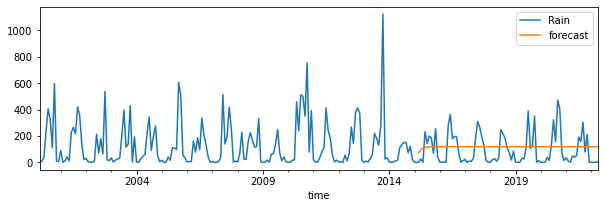

In [23]:
df['forecast']=model_fit.predict(start=180,end=265,dynamic=True)
df[['Rain','forecast']].plot(figsize=(10,3))

In [24]:
import statsmodels.api as sm

In [25]:
model=sm.tsa.statespace.SARIMAX(df['Rain'],order=(1, 0, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='time'>

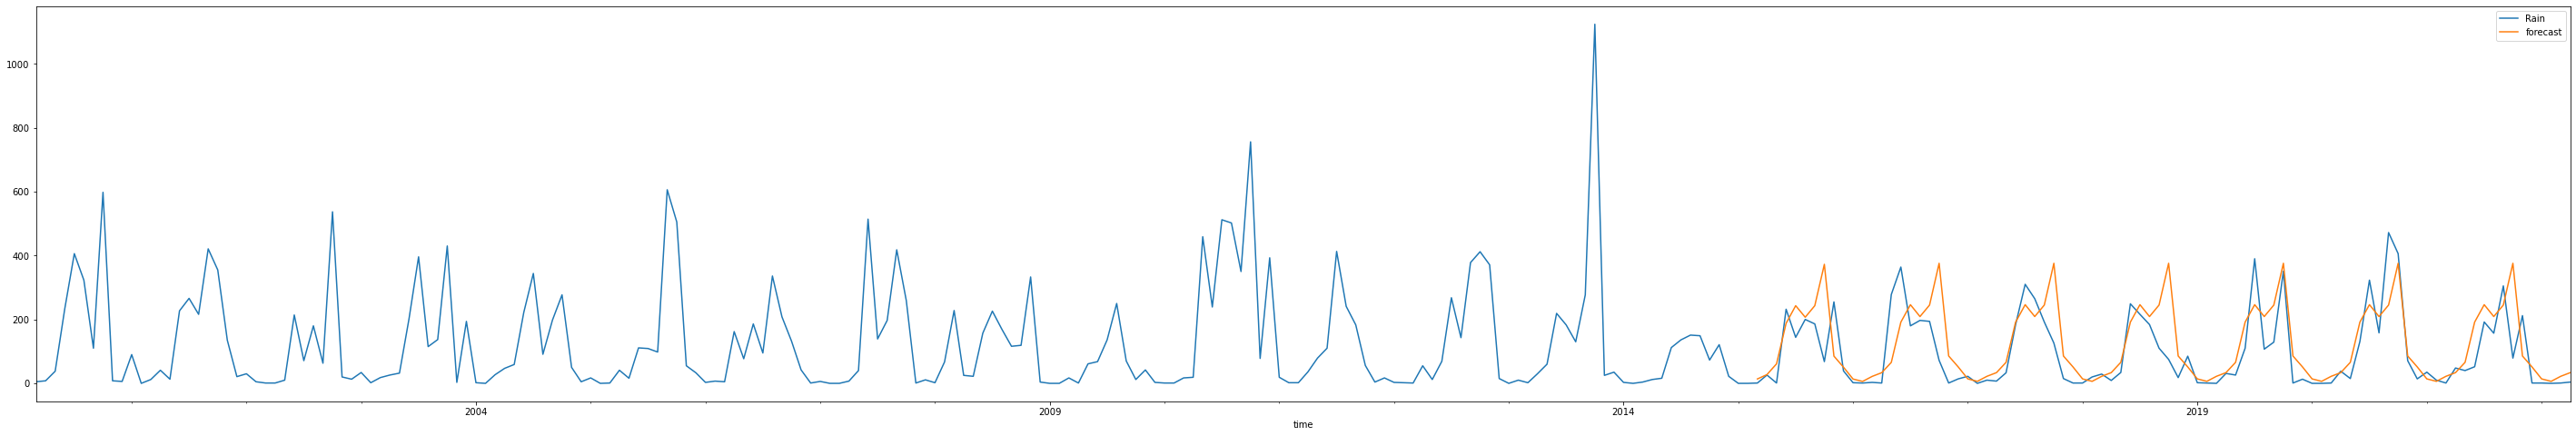

In [26]:
df['forecast']=results.predict(start=180,end=265,dynamic=True)
df[['Rain','forecast']].plot(figsize=(50,8))

In [27]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,60)]

In [28]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [29]:
future_datest_df.tail()

,Rain,forecast
2026-11-01,NaN,NaN
2026-12-01,NaN,NaN
2027-01-01,NaN,NaN
2027-02-01,NaN,NaN
2027-03-01,NaN,NaN


In [30]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

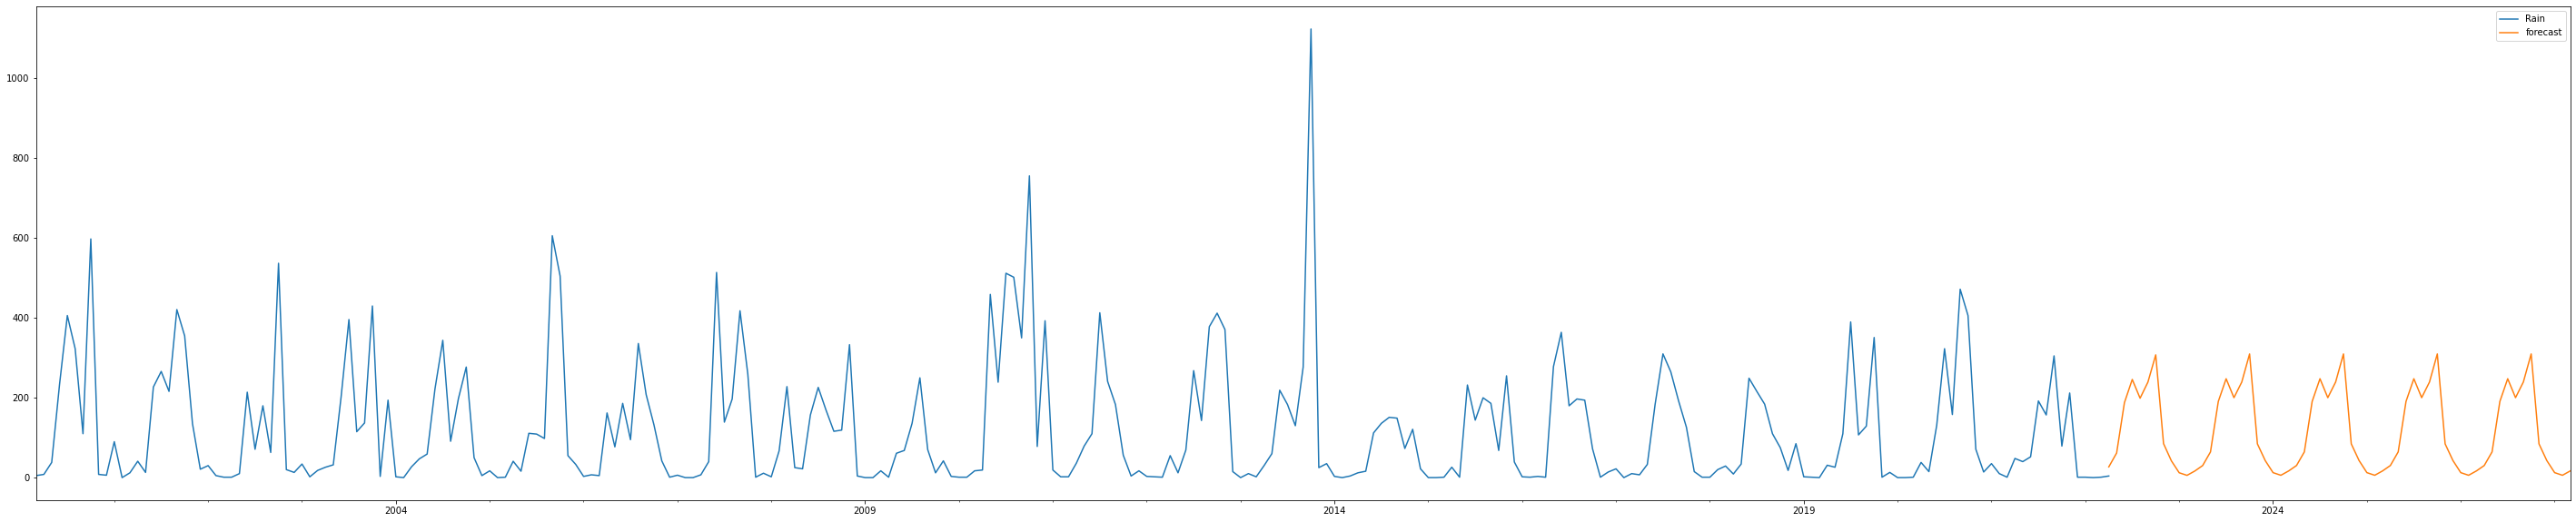

In [31]:
future_df['forecast'] = results.predict(start = 265, end = 325, dynamic= True)  
future_df[['Rain','forecast']].plot(figsize=(50,10))

In [32]:
future_df['forecast'].tail(60)

2022-04-01     26.855207
2022-05-01     61.583809
2022-06-01    187.880050
2022-07-01    245.911659
2022-08-01    198.912789
2022-09-01    239.154889
2022-10-01    307.529968
2022-11-01     85.100888
2022-12-01     42.036220
2023-01-01     12.120542
2023-02-01      5.630161
2023-03-01     16.500580
2023-04-01     30.171475
2023-05-01     64.288657
2023-06-01    190.780848
2023-07-01    247.678547
2023-08-01    200.221625
2023-09-01    239.365034
2023-10-01    309.818987
2023-11-01     84.503299
2023-12-01     42.632050
2024-01-01     12.409886
2024-02-01      5.822059
2024-03-01     16.728547
2024-04-01     30.276058
2024-05-01     64.367152
2024-06-01    190.845271
2024-07-01    247.722844
2024-08-01    200.254092
2024-09-01    239.382968
2024-10-01    309.848561
2024-11-01     84.507363
2024-12-01     42.642982
2025-01-01     12.416739
2025-02-01      5.826909
2025-03-01     16.732764
2025-04-01     30.278658
2025-05-01     64.369066
2025-06-01    190.846722
2025-07-01    247.723882
